TARGET PREDICTION =  To identify the deaths and recovered cases.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("covidus.csv")

In [4]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


UNDERSTANDING THE COLUMNS

Province_State - States within the USA.
Country_Region - The name of the Country
Last_Update - The most recent date the file was extracted.
Lat - Latitude.
Long_ - Longitude.
Confirmed - Aggregated confirmed case count for the state.
Deaths - Aggregated Death case count for the state.
Recovered - Aggregated Recovered case count for the state.
Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
Incident_Rate - confirmed cases per 100,000 persons.
People_Tested - Total number of people who have been tested.
People_Hospitalized - Total number of people hospitalized.
Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
UID - Unique Identifier for each row entry.
ISO3 - Officialy assigned country code identifiers.
Testing_Rate - Total number of people tested per 100,000 persons.
Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


In [5]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [9]:
df.shape

(58, 18)

In [8]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [11]:
df.nunique()


Province_State          58
Country_Region           1
Last_Update              1
Lat                     56
Long_                   56
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

EDA

In [19]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

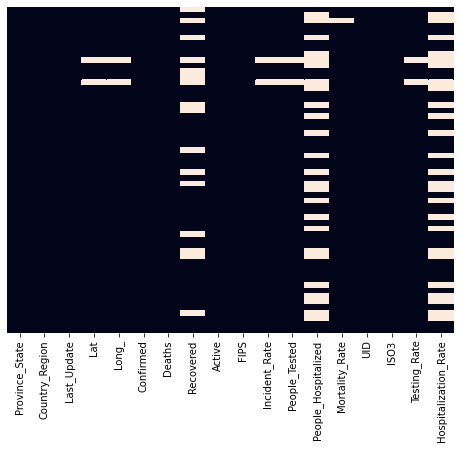

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Lat,Long_,Recovered,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
have null values

In [29]:
for col in ['Lat', 'Long_','Recovered','People_Hospitalized','Hospitalization_Rate']:
    df[col].fillna(df[col].mean(),inplace=True)

In [30]:
for col in ['Incident_Rate','People_Tested','Mortality_Rate','Testing_Rate']:
    df[col].fillna(df[col].median(),inplace=True)



As we can observe 'Incident_Rate','People_Tested','Mortality_Rate','Testing_Rate' has value 0 in many columns so it optimal to choose median

In [31]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [32]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [34]:
df.tail(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
48,Tennessee,US,2020-05-21 02:32:54,35.7478,-86.6923,18412,305,11783.000000,6324.0,47,269.608008,354013.0,1515.000000,1.656528,84000047,USA,5183.833360,8.228329
49,Texas,US,2020-05-21 02:32:54,31.0545,-97.5635,51673,1426,30341.000000,19906.0,48,178.208070,770241.0,4897.454545,2.759662,84000048,USA,2656.380746,14.342541
50,Utah,US,2020-05-21 02:32:54,40.1500,-111.8624,7710,90,4423.000000,3197.0,49,240.489738,179664.0,631.000000,1.167315,84000049,USA,5604.065930,8.184176
51,Vermont,US,2020-05-21 02:32:54,44.0459,-72.7107,944,54,824.000000,66.0,50,151.284718,25058.0,4897.454545,5.720339,84000050,USA,4015.775919,14.342541
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.000000,2.0,78,64.324869,1383.0,4897.454545,8.695652,850,VIR,1289.294104,14.342541
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.000000,27310.0,51,385.541875,212626.0,6059.000000,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,7007.428571,17934.0,53,249.130224,293120.0,4897.454545,5.466238,84000053,USA,3849.298999,14.342541
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.000000,548.0,54,87.437024,80641.0,4897.454545,4.403318,84000054,USA,4499.686689,14.342541
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.000000,5204.0,55,230.367575,167713.0,2161.000000,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.000000,248.0,56,135.980607,18840.0,74.000000,1.397713,84000056,USA,3255.240955,9.402795


In [35]:
#EXPLORING CATEGORICAL COLUMN

In [36]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('*************************************************************************')
        print('\n')

Province_State:['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Oklahoma                    1
North Carolina              1
Nevada                      1
Arkansas                    1
District of Columbia        1
Michigan                    1
South Dakota                1
Washington                  1
Missouri            

Fom above analysis we can undestand their are 58 province_state data being extracted 
Country_Region-all the above states belong to US and we already have information of the same in ISO3 hence we can drop this column
Last_Update- As similar to Country_Region in Last_Update also we find only one information whuch shows all data bwlongs to 2020-05-21 02:32:54 date and time hence it will not hav impact on prediction 
iso3 which specifies country code identifiers 6 different categories--which can be converted to integers with label encoder


In [38]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

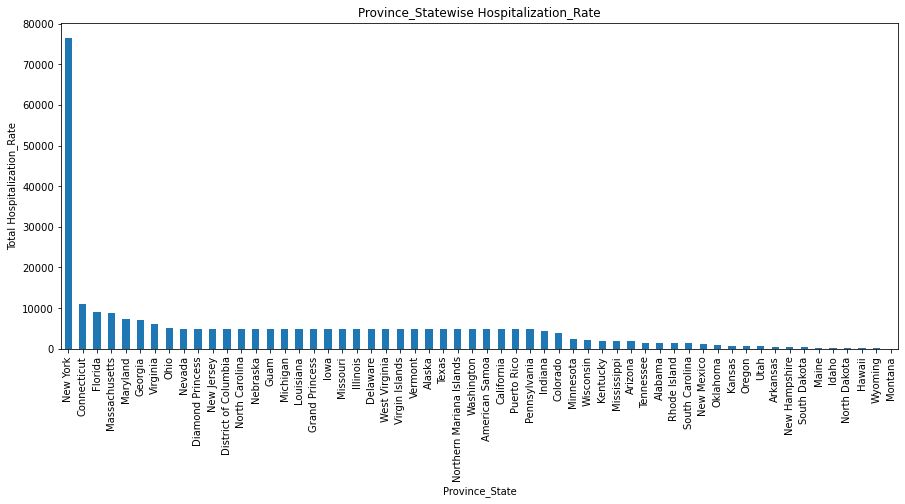

Province_State
New York                    76410.000000
Connecticut                 10946.000000
Florida                      8934.000000
Massachusetts                8897.000000
Maryland                     7393.000000
Georgia                      7107.000000
Virginia                     6059.000000
Ohio                         5198.000000
Nevada                       4897.454545
Diamond Princess             4897.454545
New Jersey                   4897.454545
District of Columbia         4897.454545
North Carolina               4897.454545
Nebraska                     4897.454545
Guam                         4897.454545
Michigan                     4897.454545
Louisiana                    4897.454545
Grand Princess               4897.454545
Iowa                         4897.454545
Missouri                     4897.454545
Illinois                     4897.454545
Delaware                     4897.454545
West Virginia                4897.454545
Virgin Islands               4897.454545
V

In [86]:

plt.subplots(figsize = (15, 6))
People_Hospitalized = df.groupby('Province_State').sum()
pt = People_Hospitalized['People_Hospitalized'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Hospitalization_Rate')
ax.set_title('Province_Statewise Hospitalization_Rate')
plt.show()
print(pt)

Highest Hospitalization_Rate is ranked as follows
New York                
Connecticut                 
Florida                      
Massachusetts                
Maryland                     
Georgia                      
Virginia                     
Ohio                         
Nevada                       
Diamond Princess             

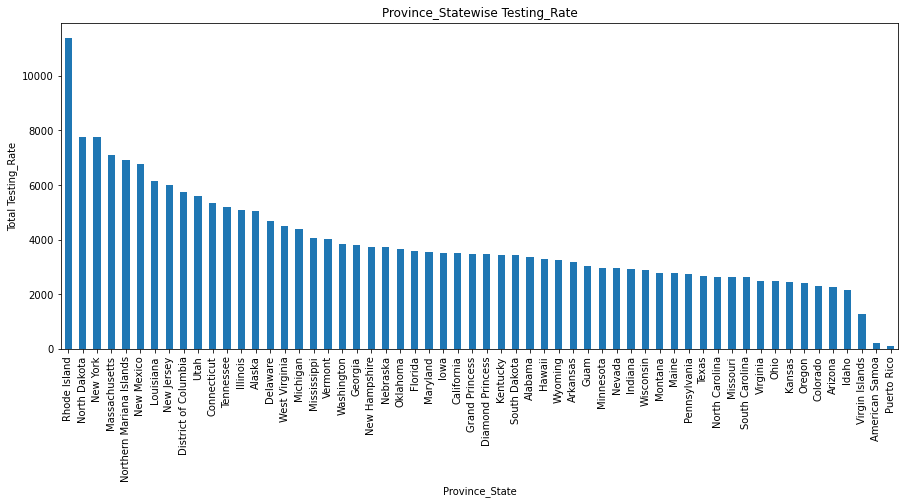

Province_State
Rhode Island                11377.424693
North Dakota                 7768.396797
New York                     7740.670204
Massachusetts                7108.491647
Northern Mariana Islands     6921.877267
New Mexico                   6783.862680
Louisiana                    6151.487891
New Jersey                   5982.117023
District of Columbia         5727.106946
Utah                         5604.065930
Connecticut                  5349.302875
Tennessee                    5183.833360
Illinois                     5071.986102
Alaska                       5063.940017
Delaware                     4663.552976
West Virginia                4499.686689
Michigan                     4376.471997
Mississippi                  4054.904509
Vermont                      4015.775919
Washington                   3849.298999
Georgia                      3795.082856
New Hampshire                3742.560000
Nebraska                     3729.047853
Oklahoma                     3648.523075
F

In [230]:

plt.subplots(figsize = (15, 6))
Hospitalization_Rate = df.groupby('Province_State').sum()
pt = Hospitalization_Rate['Testing_Rate'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Testing_Rate')
ax.set_title('Province_Statewise Testing_Rate')
plt.show()
print(pt)

Rhode Island                
North Dakota                 
New York                    
Massachusetts                
Northern Mariana Islands     
New Mexico                   
Louisiana                    
New Jersey                   
District of Columbia         
Utah
Above is the top 10 states which has tested high comparitively

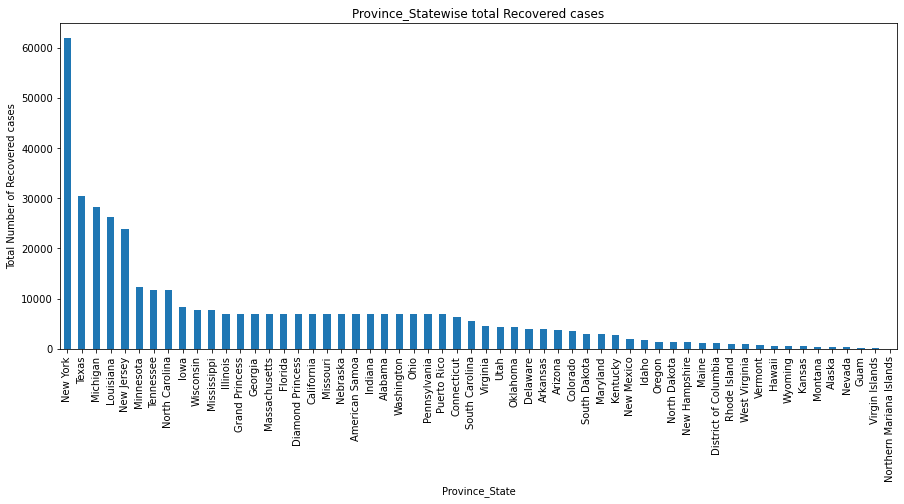

Province_State
New York                    61886.000000
Texas                       30341.000000
Michigan                    28234.000000
Louisiana                   26249.000000
New Jersey                  23945.000000
Minnesota                   12227.000000
Tennessee                   11783.000000
North Carolina              11637.000000
Iowa                         8362.000000
Wisconsin                    7728.000000
Mississippi                  7681.000000
Illinois                     7007.428571
Grand Princess               7007.428571
Georgia                      7007.428571
Massachusetts                7007.428571
Florida                      7007.428571
Diamond Princess             7007.428571
California                   7007.428571
Missouri                     7007.428571
Nebraska                     7007.428571
American Samoa               7007.428571
Indiana                      7007.428571
Alabama                      7007.428571
Washington                   7007.428571
O

In [40]:
plt.subplots(figsize = (15, 6))
recovered_cases = df.groupby('Province_State').sum()
pt = recovered_cases['Recovered'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Number of Recovered cases')
ax.set_title('Province_Statewise total Recovered cases')
plt.show()
print(pt)

New York                    
Texas                       
Michigan                    
Louisiana                   
New Jersey                  
Minnesota                   
Tennessee                   
North Carolina              
Iowa                        
Wisconsin
Top 10 states having highest recovered cases

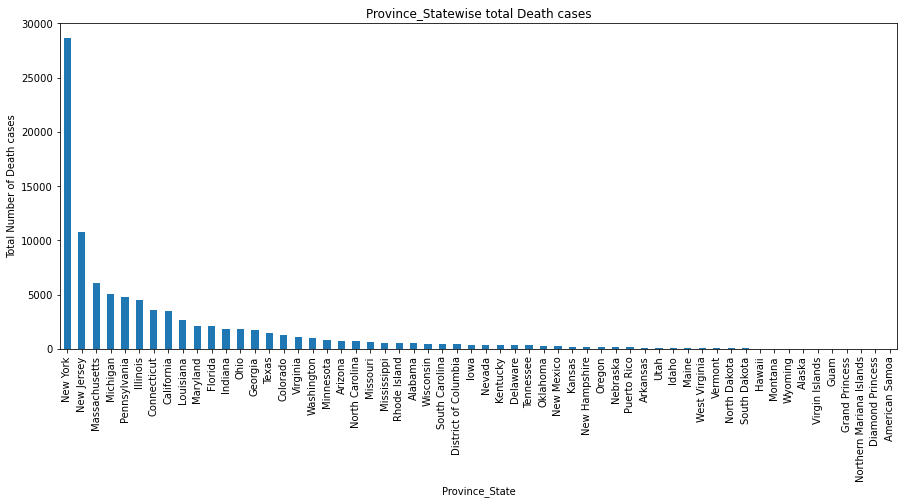

Province_State
New York                    28636
New Jersey                  10749
Massachusetts                6066
Michigan                     5060
Pennsylvania                 4770
Illinois                     4525
Connecticut                  3529
California                   3497
Louisiana                    2608
Maryland                     2123
Florida                      2096
Indiana                      1864
Ohio                         1781
Georgia                      1697
Texas                        1426
Colorado                     1299
Virginia                     1075
Washington                   1037
Minnesota                     786
Arizona                       747
North Carolina                726
Missouri                      640
Mississippi                   570
Rhode Island                  538
Alabama                       522
Wisconsin                     481
South Carolina                407
District of Columbia          407
Iowa                          393

In [231]:
plt.subplots(figsize = (15, 6))
Deaths_cases = df.groupby('Province_State').sum()
pt = Deaths_cases['Deaths'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Number of Death cases')
ax.set_title('Province_Statewise total Death cases')
plt.show()

print(pt)

New York                    
New Jersey                  
Massachusetts                
Michigan                     
Pennsylvania                 
Illinois                     
Connecticut                  
California                   
Louisiana                    
Maryland
Above are the top 10 states having highest Deaths 

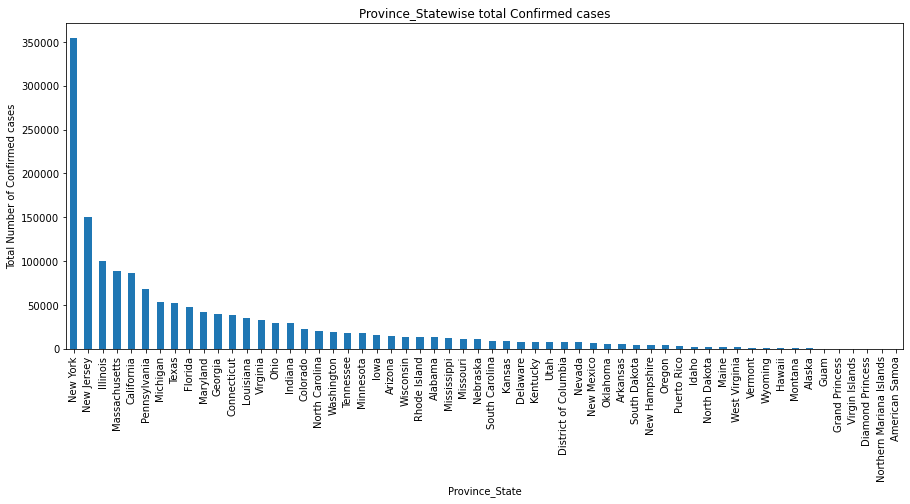

Province_State
New York                    354370
New Jersey                  150776
Illinois                    100418
Massachusetts                88970
California                   85997
Pennsylvania                 68126
Michigan                     53009
Texas                        51673
Florida                      47471
Maryland                     42323
Georgia                      39801
Connecticut                  39017
Louisiana                    35316
Virginia                     32908
Ohio                         29436
Indiana                      29274
Colorado                     22797
North Carolina               20262
Washington                   18971
Tennessee                    18412
Minnesota                    17670
Iowa                         15620
Arizona                      14906
Wisconsin                    13413
Rhode Island                 13356
Alabama                      13052
Mississippi                  11967
Missouri                     11528
Nebra

In [45]:
plt.subplots(figsize = (15, 6))
Confirmed_cases = df.groupby('Province_State').sum()
pt = Confirmed_cases['Confirmed'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Number of Confirmed cases')
ax.set_title('Province_Statewise total Confirmed cases')
plt.show()
print(pt)

In [ ]:
States with highest Confirmed cases
New York                    
New Jersey                  
Illinois                    
Massachusetts                
California                   
Pennsylvania                 
Michigan                     
Texas                        
Florida                      
Maryland

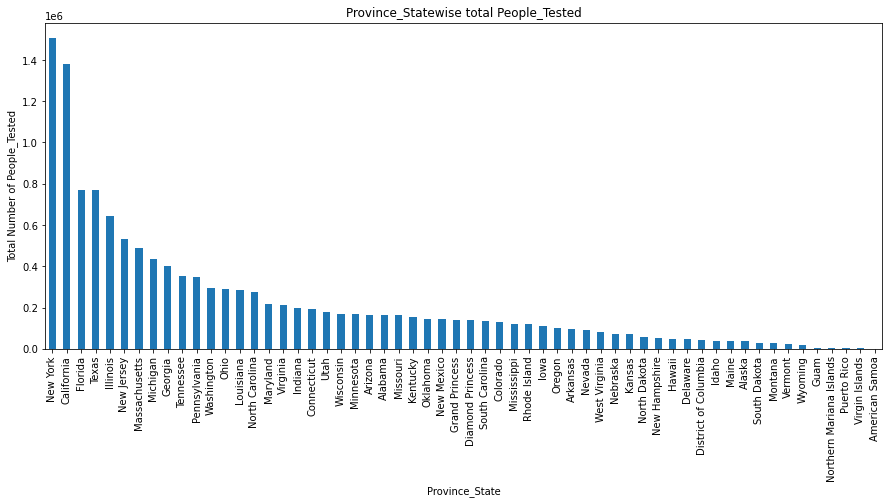

Province_State
New York                    1505836.0
California                  1380120.0
Florida                      771348.0
Texas                        770241.0
Illinois                     642713.0
New Jersey                   531343.0
Massachusetts                489953.0
Michigan                     437072.0
Georgia                      402940.0
Tennessee                    354013.0
Pennsylvania                 349700.0
Washington                   293120.0
Ohio                         289528.0
Louisiana                    285970.0
North Carolina               277603.0
Maryland                     215330.0
Virginia                     212626.0
Indiana                      195738.0
Connecticut                  190718.0
Utah                         179664.0
Wisconsin                    167713.0
Minnesota                    167338.0
Arizona                      165435.0
Alabama                      164450.0
Missouri                     161984.0
Kentucky                     153986

In [81]:
plt.subplots(figsize = (15, 6))
People_Tested_cases = df.groupby('Province_State').sum()
pt = People_Tested_cases['People_Tested'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Number of People_Tested')
ax.set_title('Province_Statewise total People_Tested')
plt.show()
print(pt)

New York                    
California                  
Florida                      
Texas                        
Illinois                     
New Jersey                   
Massachusetts                
Michigan                     
Georgia                      
Tennessee
Top 10 states with highest People_Tested

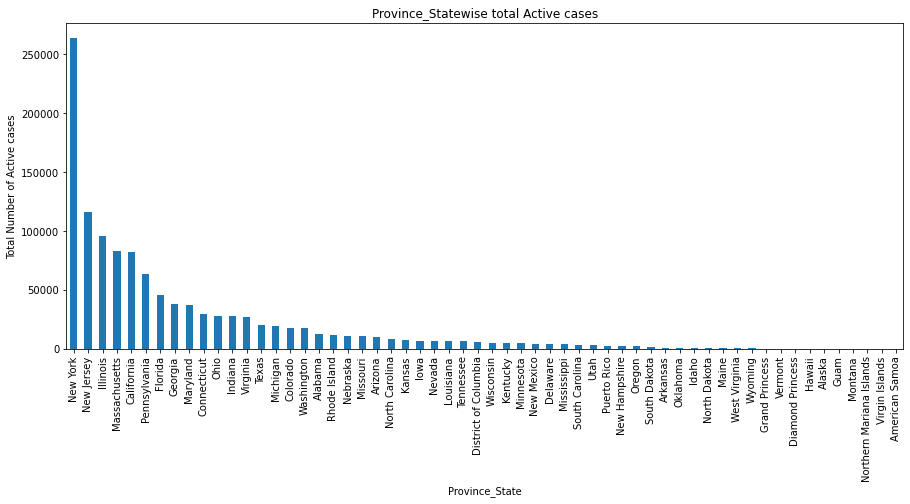

Province_State
New York                    263848.0
New Jersey                  116082.0
Illinois                     95893.0
Massachusetts                82904.0
California                   82500.0
Pennsylvania                 63356.0
Florida                      45375.0
Georgia                      38104.0
Maryland                     37207.0
Connecticut                  29224.0
Ohio                         27655.0
Indiana                      27410.0
Virginia                     27310.0
Texas                        19906.0
Michigan                     19715.0
Colorado                     18020.0
Washington                   17934.0
Alabama                      12530.0
Rhode Island                 11788.0
Nebraska                     10984.0
Missouri                     10888.0
Arizona                      10386.0
North Carolina                7899.0
Kansas                        7832.0
Iowa                          6865.0
Nevada                        6675.0
Louisiana              

In [44]:
plt.subplots(figsize = (15, 6))
Active_cases = df.groupby('Province_State').sum()
pt = Active_cases['Active'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Province_State')
ax.set_ylabel('Total Number of Active cases')
ax.set_title('Province_Statewise total Active cases')
plt.show()
print(pt)

New York                    
New Jersey                  
Illinois                     
Massachusetts                
California                   
Pennsylvania                 
Florida                      
Georgia                      
Maryland                     
Connecticut
Top 10 states with Active cases

In [240]:
Active_cases=['New York','New Jersey','Illinois','Massachusetts','California','Pennsylvania','Florida','Georgia','Maryland']
people_tested=['New York','California','Florida','Texas','Illinois','New Jersey','Massachusetts','Michigan','Georgia','Tennessee']
Confirmed_cases=['New York','New Jersey','Illinois','Massachusetts','California','Pennsylvania','Michigan','Texas','Florida','Maryland']
Mortatlity_rate=['Michigan','Northern Mariana Islands','Connecticut','Virgin Islands','New York','Louisiana','New Jersey','Pennsylvania','Massachusetts','Indiana']
Deaths=['New York','New Jersey','Massachusetts','Michigan','Pennsylvania','Illinois','Connecticut','California','Louisiana','Maryland']
Recovered=['New York','Texas','Michigan','Louisiana','New Jersey','Minnesota','Tennessee','North Carolina','Iowa','Wisconsin']

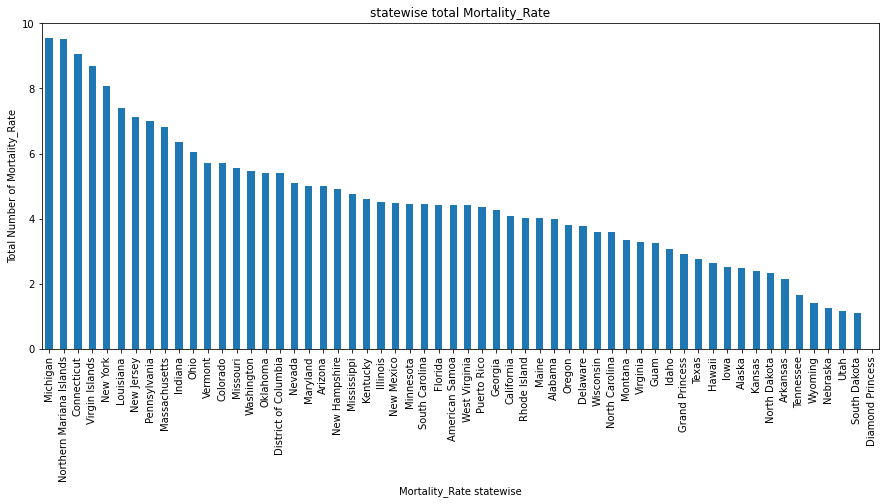

Province_State
Michigan                    9.545549
Northern Mariana Islands    9.523810
Connecticut                 9.044775
Virgin Islands              8.695652
New York                    8.080819
Louisiana                   7.384755
New Jersey                  7.129119
Pennsylvania                7.001732
Massachusetts               6.818029
Indiana                     6.367425
Ohio                        6.050414
Vermont                     5.720339
Colorado                    5.698118
Missouri                    5.551700
Washington                  5.466238
Oklahoma                    5.404917
District of Columbia        5.390015
Nevada                      5.102870
Maryland                    5.016185
Arizona                     5.011405
New Hampshire               4.912099
Mississippi                 4.763099
Kentucky                    4.603894
Illinois                    4.506164
New Mexico                  4.479975
Minnesota                   4.448217
South Carolina         

In [52]:
plt.subplots(figsize = (15, 6))
confirmed_cases = df.groupby('Province_State').sum()
pt = confirmed_cases['Mortality_Rate'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Mortality_Rate statewise')
ax.set_ylabel('Total Number of Mortality_Rate')
ax.set_title('statewise total Mortality_Rate')
plt.show()
print(pt)

Michigan                    
Northern Mariana Islands    
Connecticut                 
Virgin Islands              
New York                    
Louisiana                   
New Jersey                  
Pennsylvania                
Massachusetts               
Indiana
Highest Mortality_Rate is encountered in these states

In [47]:
df.apply(lambda x : len(x.unique()))

Province_State          58
Country_Region           1
Last_Update              1
Lat                     57
Long_                   57
Confirmed               58
Deaths                  56
Recovered               43
Active                  58
FIPS                    58
Incident_Rate           57
People_Tested           57
People_Hospitalized     34
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            57
Hospitalization_Rate    34
dtype: int64

In [48]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.403318,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [49]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.000000,27310.0,51,385.541875,212626.0,6059.000000,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,7007.428571,17934.0,53,249.130224,293120.0,4897.454545,5.466238,84000053,USA,3849.298999,14.342541
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.000000,548.0,54,87.437024,80641.0,4897.454545,4.403318,84000054,USA,4499.686689,14.342541
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.000000,5204.0,55,230.367575,167713.0,2161.000000,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.000000,248.0,56,135.980607,18840.0,74.000000,1.397713,84000056,USA,3255.240955,9.402795


SUMMARY STATISTICS

In [53]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,391.204822,2.228466e+05,4897.454545,4.457301,7.676194e+07,3879.552237,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,396.463546,2.939333e+05,9879.577790,2.116203,2.378302e+07,1900.557214,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,250.477287,1.386545e+05,4897.454545,4.403318,8.400003e+07,3469.782532,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.620348e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


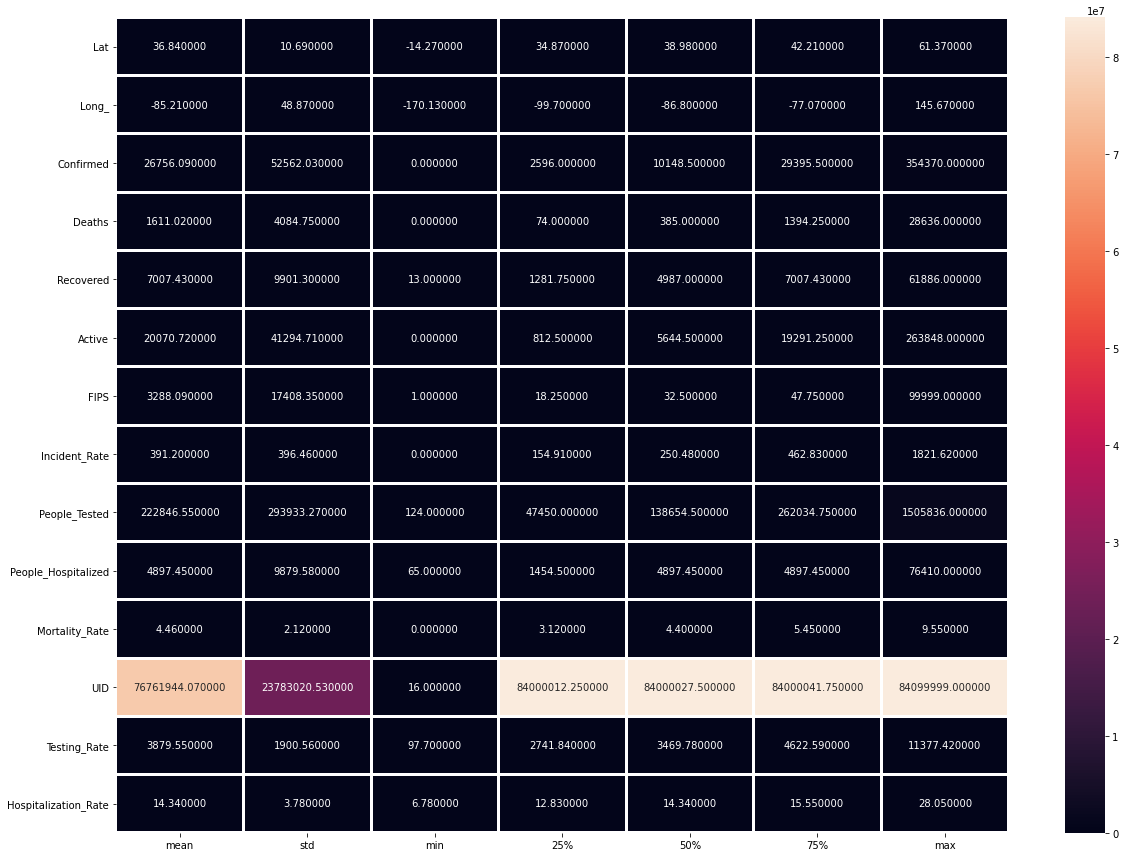

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")


plt.show()

DESCRIBE column shows the distribution of data and helps us analyse if the data is normally distributed 
UID column,Testing_Rate data is disbursed as we can observe variations in mean and std mean and median,min value and Q1
Hospitalization_Rate we can observe mean and median are normal but mean and std as well Q3 and max value is not normally distributed 
Mortality_Rate and People_Hospitalized mean and median is normally distributed but their is outliers when we observe mean and std
variations are found in Death,confirmed  and Recovery too
while observing mean and median:- Testing_Rate,UID,People_Hospitalized,People_Tested,Incident_Rate,FIPS,Active,Recovered,Deaths and Confirmed are having high differnce,which shows data is not normally distributed
mean and std data shows only People_tested and Incident_Rate is normally distributed
        similarly their is high deviation between Q3 and max data


In [66]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

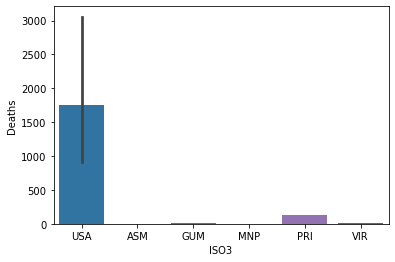

In [68]:
sns.barplot (x='ISO3',y='Deaths',data=df)

Deaths is highest in USA but we cannot drive conclusion since population is high in in USA

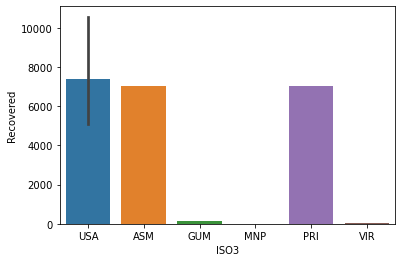

In [69]:
sns.barplot (x='ISO3',y='Recovered',data=df)

while observing recovery cases according countries USA has the highest recovery cases which shows medical treatment and hospitalization is good in this country

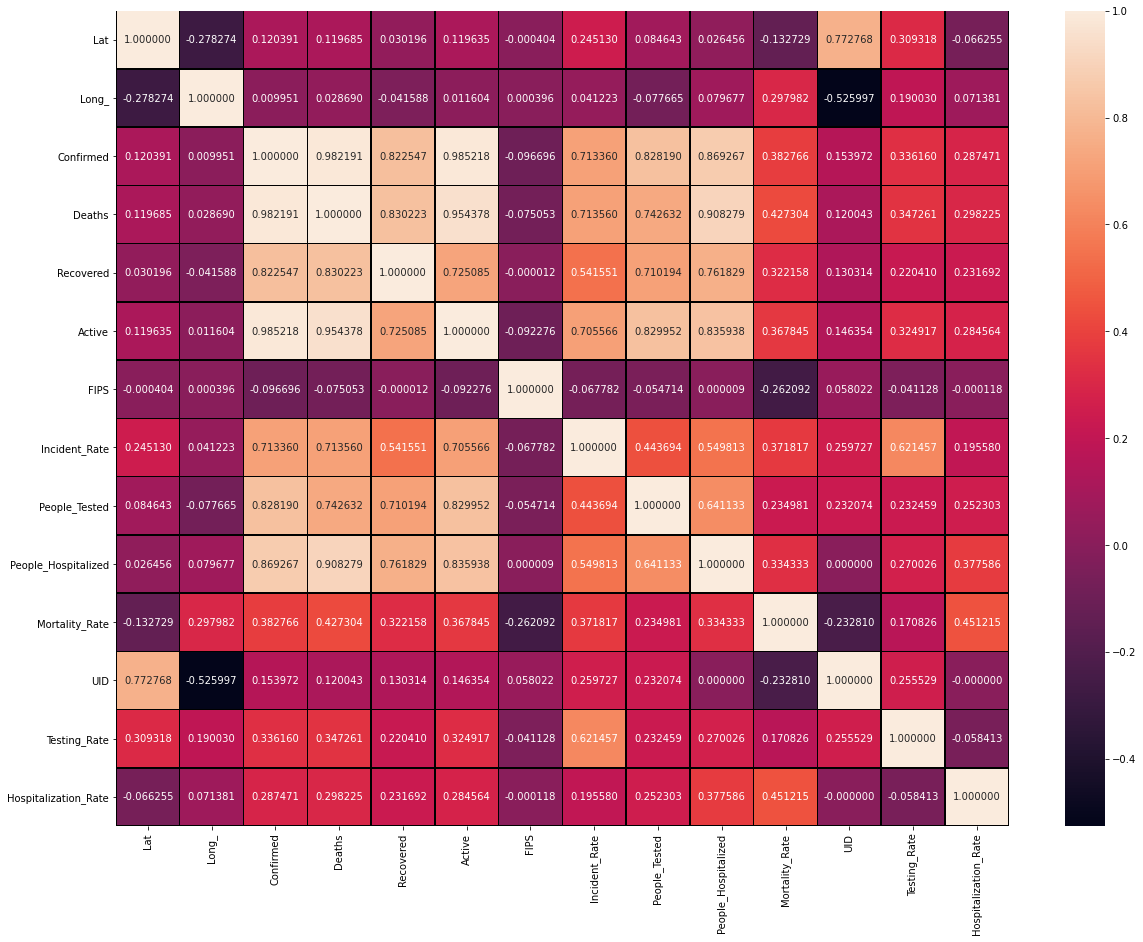

In [57]:
df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='2f')

The correlation between Deaths and other attributes we can conclude 
postively high correlation with Death and 
Confirmed by 98%
Recovered by 86%
Active by 95%
People_Hospitalized=99%
People_Tested=74%
Incident_Rate=71%

Negative Correlation of Death is with
FIPS with7.5%


Text(0.5, 1.0, 'correlation with target variables')

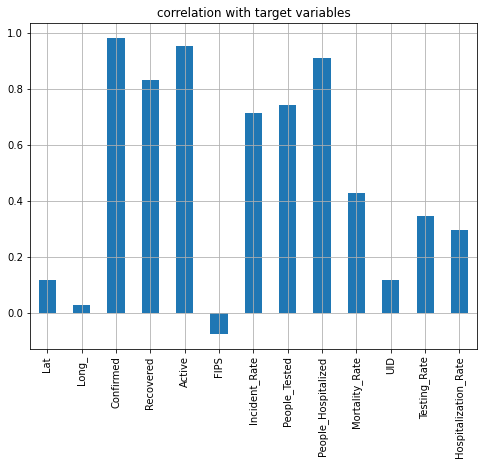

In [76]:
plt.figure(figsize=(8,6))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")

Since our target variable is death column we can study its correlation with other variables in above figure
Confirmed,Active,People_Hospitalized,Recovered are highly positive correlation
People_Tested,Incident_Rate,Mortality_Rate,Testing_Rate,Hospitalization_Rate are postive correlated
Low positive correlation is found in Lat,Long and UID
negative correlation of daeth is with FIPS


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 <a list of 9 Text major ticklabel objects>)

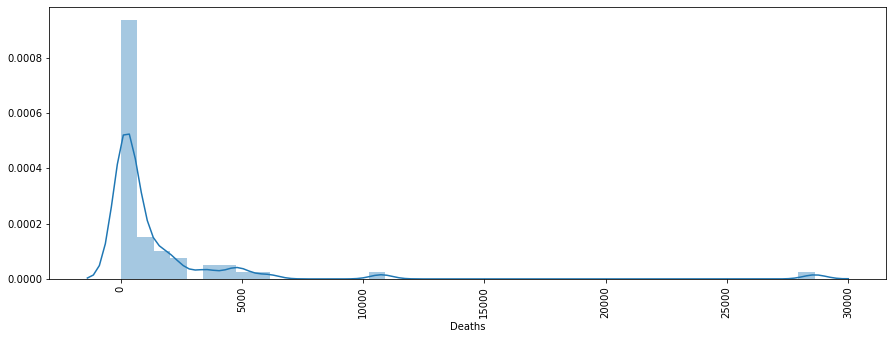

In [249]:
plt.figure(figsize=(15,5))
sns.distplot(df.Deaths)
plt.xticks(rotation=90)

The data 0 deaths are more in number and data is not normally distributed

CLEANIG DATA

In [87]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [88]:
new_df=df.drop(['Province_State', 'Country_Region', 'Last_Update','Lat', 'Long_','UID'], axis=1)
new_df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,USA,3353.942386,11.438860
1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,USA,5063.940017,14.342541
2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.403318,ASM,222.857246,14.342541
3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,USA,2272.859351,12.022005
4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,USA,3189.670370,10.693584


In [91]:
new_df.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           2.012296
People_Tested           2.847892
People_Hospitalized     6.869437
Mortality_Rate          0.497497
Testing_Rate            1.333601
Hospitalization_Rate    0.867341
dtype: float64

Confirmed                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Deaths                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Recovered                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Active                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FIPS                       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Incident_Rate           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
People_Tested           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
People_Hospitalized     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Mortality_Rate             AxesSubplot(0.125,0.321957;0.168478x0.16413)
Testing_Rate            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Hospitalization_Rate    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

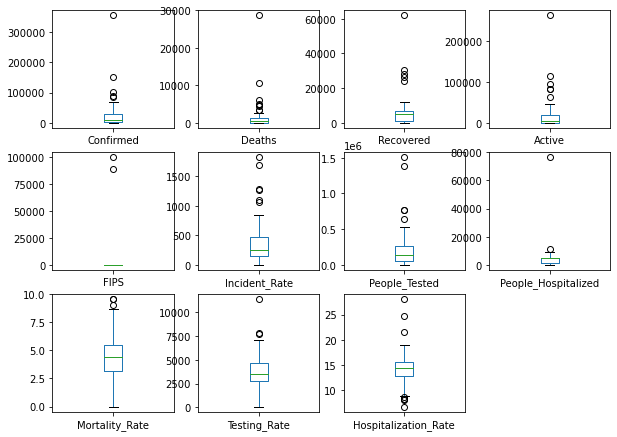

In [92]:
new_df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

new_df['ISO3']=le.fit_transform(new_df['ISO3'])

TREATING OUTLIERS

In [113]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(new_df))
threshold=3
np.where(z>3)

(array([ 2,  5,  7,  9, 13, 14, 34, 36, 36, 36, 36, 36, 36, 36, 45],
       dtype=int64),
 array([ 9,  6, 11,  4,  4,  9,  5,  0,  1,  2,  3,  5,  6,  7, 10],
       dtype=int64))

In [114]:
new_data=new_df[(z<3).all(axis=1)]
new_data

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584
6,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,4,2289.339188,17.348774
8,8194,310,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,3.783256,4,4663.552976,14.342541
10,7551,407,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,4,5727.106946,14.342541
11,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4.415327,4,3591.383953,18.819911
12,39801,1697,7007.428571,38104.0,13,374.864974,402940.0,7107.000000,4.263712,4,3795.082856,17.856335
15,643,17,578.000000,48.0,15,45.413710,46304.0,82.000000,2.643857,4,3270.352122,12.752722


In [116]:
new_df.shape, new_data.shape

((58, 12), (49, 12))

In [117]:
percentage_loss=((58-49)/58)*100
print(percentage_loss)

15.517241379310345


MODEL BUILDING

In [118]:
x=new_df.drop(columns=['Deaths'],axis=1)
x.head()

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
1,401,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
2,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.403318,0,222.857246,14.342541
3,14906,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
4,5003,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584


In [119]:
y=new_df['Deaths']
y.head()

0    522
1     10
2      0
3    747
4    107
Name: Deaths, dtype: int64

In [120]:
new_df.dtypes

Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                      int64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.62999251e-01,  0.00000000e+00, -1.84202386e-01,
        -1.90471516e-01, -3.18067873e-01, -2.00407990e-01,
        -3.47604767e-01, -2.18274475e-01,  2.17198770e-01,
        -2.78971037e-01, -7.74497410e-01],
       [-5.05788407e-01, -6.78047590e-01, -4.89328519e-01,
        -1.90413571e-01, -8.55885203e-01, -6.37642368e-01,
         0.00000000e+00, -9.35961285e-01,  2.17198770e-01,
         6.28621946e-01, -4.73806709e-16],
       [-5.13484119e-01,  0.00000000e+00, -4.90281199e-01,
        -1.87052738e-01, -9.95353865e-01, -7.64349566e-01,
         0.00000000e+00, -2.57319108e-02, -5.38170286e+00,
        -1.94081597e+00, -4.73806709e-16],
       [-2.27418578e-01, -3.29519951e-01, -2.36575329e-01,
        -1.90297680e-01, -4.74303637e-01, -1.97027622e-01,
        -3.17075993e-01,  2.64125511e-01,  2.17198770e-01,
        -8.52763280e-01, -6.18955558e-01],
       [-4.17470037e-01, -3.21471520e-01, -4.64778702e-01,
        -1.90239734e-01, -5.73547838e-01, -4.34432453e-01,
  

In [122]:
y=le.fit_transform(y)

In [123]:
x.shape

(58, 11)

In [124]:
y.shape

(58,)

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [128]:
x_train.shape,x_test.shape

((46, 11), (12, 11))

In [129]:
y_train.shape,y_test.shape

((46,), (12,))

In [143]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [144]:
max_r_score=0
for r_state in range (42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

max r2 score corresponding to:- 61 is 0.9087108138350589


In [206]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.47511074230810746

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)


In [208]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x00000187D40C6820> (array([[-5.10528659e-01, -7.01174096e-01, -4.89694935e-01,
        -1.86705065e-01, -7.56768291e-01, -7.47711975e-01,
        -3.63693749e-17, -5.77033547e-01, -3.98197745e+00,
        -4.52243232e-01, -1.29254736e-16],
       [-1.24629967e-01,  4.71655539e-01, -2.97326966e-01,
        -1.88385482e-01, -5.03813190e-01,  1.87915715e-01,
        -3.63693749e-17, -4.16724811e-01,  2.17198770e-01,
        -6.54269484e-01, -1.29254736e-16],
       [-1.60133875e-01,  4.86529855e-01, -3.35800559e-01,
        -1.87806028e-01, -3.09382328e-01,  4.50143091e-01,
        -3.45358503e-01, -1.33504839e+00,  2.17198770e-01,
         6.92256161e-01, -1.63084052e+00],
       [-3.65519184e-01, -2.63298681e-01, -4.12185910e-01,
        -1.87690137e-01, -3.83468794e-01, -1.48195880e-01,
        -4.35617489e-01, -1.56824236e+00,  2.17198770e-01,
         9.15297482e-01, -1.64261741e+00],
       [-1.74373820e-01,  5.31764077e-01, -3.76521500e-01,
     

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

LASSO REGRESSOR

In [150]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [151]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- 36.0280264957373
R2_score is:- 60.0662814840309


At cv:- 3
Cross validation score is :- -3.6091828436558373
R2_score is:- 60.0662814840309


At cv:- 4
Cross validation score is :- 14.867361669137985
R2_score is:- 60.0662814840309


At cv:- 5
Cross validation score is :- 42.34480341255402
R2_score is:- 60.0662814840309


At cv:- 6
Cross validation score is :- 17.531647082506293
R2_score is:- 60.0662814840309


At cv:- 7
Cross validation score is :- 23.712559592041487
R2_score is:- 60.0662814840309


At cv:- 8
Cross validation score is :- -0.03471773507190967
R2_score is:- 60.0662814840309


At cv:- 9
Cross validation score is :- 28.528801715928516
R2_score is:- 60.0662814840309




In [181]:
print ("at cv :-",5)
print("at cross validation score is :-",42.34480)
print("r2_score:-",60.06628)

at cv :- 5
at cross validation score is :- 42.3448
r2_score:- 60.06628


In [182]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [183]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 9.058820464323516
MeanSquaredError: 124.06907171430147
RootMeanSquareError: 11.138629705412667


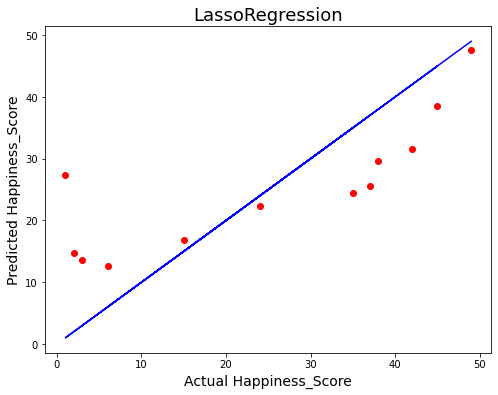

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [155]:
#DecisionTreeRegressor

In [214]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random'],'random_state':[10,40,60]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mse', 'random_state': 40, 'splitter': 'best'}


In [215]:
dt=DecisionTreeRegressor(criterion='mae',splitter='random',random_state=40)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

R2 Score: 76.26232146449406
cross val score: 83.22926041034175


In [216]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:-
MeanAbsoluteError: 6.583333333333333
MeanSquaredError: 73.75
RootMeanSquareError: 8.587782018658833


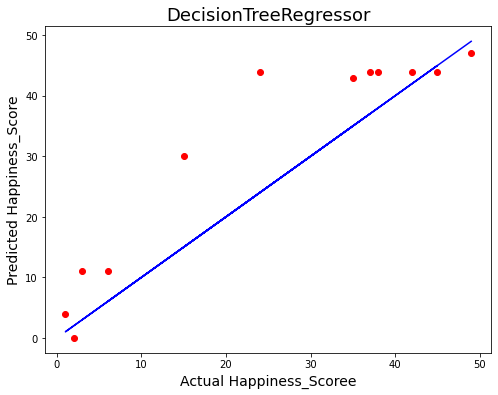

In [217]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Scoree",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [188]:
#RandomForestRegressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 300}


In [221]:
rf=RandomForestRegressor(criterion='mae',n_estimators=300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random=rf.predict(x_test)

rfs=r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)
print('difference',{(r2score*100)-(rfc*100)})

R2 Score: 92.31336358285462
cross val score: 90.41619176022418
difference {0.45488962328171567}


In [190]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_random))
print('MeanSquaredError:',mean_squared_error(y_test,pred_random))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:-
MeanAbsoluteError: 4.016666666666666
MeanSquaredError: 24.621483333333334
RootMeanSquareError: 4.962003963454013


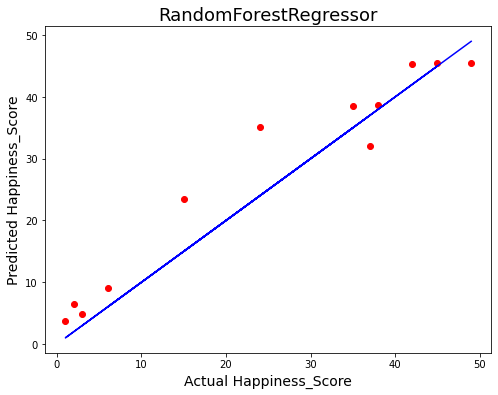

In [191]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("RandomForestRegressor",fontsize=18)
plt.show()

In [192]:
#GradientBoostingRegressor

In [166]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'lad', 'n_estimators': 200}


In [193]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='lad',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_random)
print('R2 SCORE',gbrs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbrc=gbscore.mean()
print('CrossValScore:',gbrc*100)

R2 SCORE 92.07516126869174
CrossValScore: 95.07924865333355


In [194]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Error:-
MeanAbsoluteError: 2.520335884277282
MeanSquaredError: 10.69853842721306
RootMeanSquareError: 3.2708620312102834


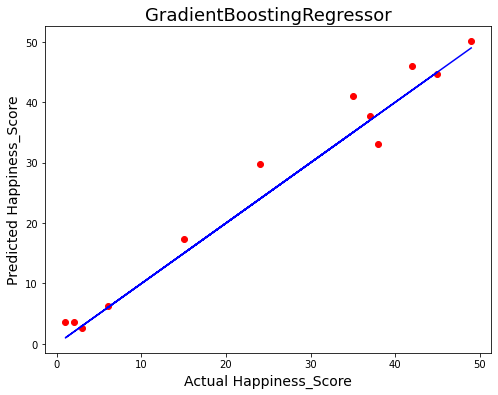

In [195]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [196]:
#AdaBoostRegressor

In [171]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 2.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 50}


In [197]:
ADB=AdaBoostRegressor(base_estimator='None',learning_rate='2.0',loss='linear',n_estimators=50,random_state=50)

ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
pred_ADB=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=90.8710813835059,Cross_Val_score=90.98509756847075and difference=-0.11401618496485355


In [198]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

Error:-
MeanAbsoluteError: 3.574074074074074
MeanSquaredError: 20.2482573276224
RootMeanSquareError: 4.49980636556979


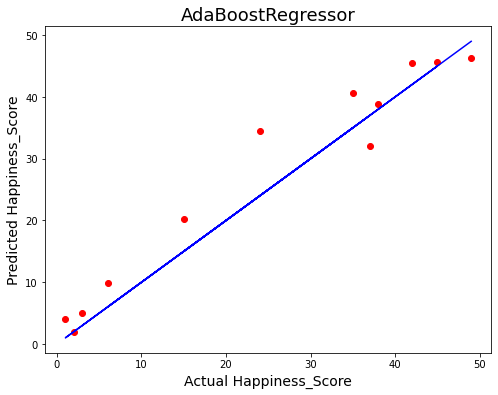

In [199]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ADB,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()

In [176]:
#SGD Regressor

In [177]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.1, 'epsilon': 0.01, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [200]:
SGD=SGDRegressor(alpha=0.1,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=90.8710813835059,Cross_Val_score=12.783020943629644and difference=78.08806043987624


In [201]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 6.490802240686964
MeanSquaredError: 59.6397761407569
RootMeanSquareError: 7.722679336911309


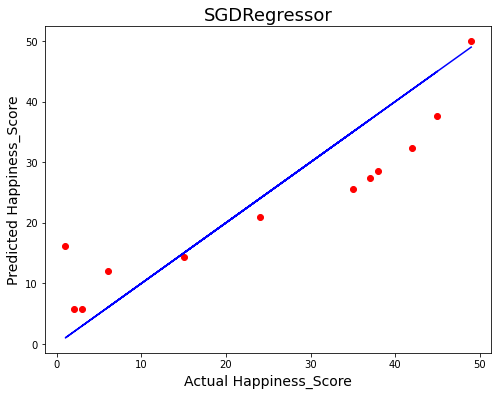

In [202]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Happiness_Score",fontsize=14)
plt.ylabel("Predicted Happiness_Score",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [219]:


parameters={"bootstrap":['True','False'],"max_depth":[10,20,30,40],"max_features":['auto','sqrt'],"min_samples_leaf":[1,2,4],"min_samples_split":[2,5,10],"n_estimators":[200,400,600,800,1000]}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 90.83529672098169


<bound method BaseSearchCV.fit of GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'random_state': [10, 40, 60],
                         'splitter': ['best', 'random']})>

#the best model is RandomForestRegressor as difference between percentage score and r2 score is optimum (0.45488962328171567) and RMSE is least in this model

SERIALIZATION

In [222]:
import pickle
filename='COVIDUS.CSV.pkl'
pickle.dump(rf,open(filename,'wb'))

In [223]:
#Conclusion

In [224]:
import numpy as np

In [225]:
a=np.array(y_test)
predicted=np.array(SGD.predict(x_test))

In [226]:
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

PREDICTION

In [227]:
df_com

,original,predicted
0,3,5.789839
1,35,25.532733
2,24,20.884196
3,15,14.381060
4,37,27.360387
5,2,5.768873
6,1,16.103479
7,42,32.356270
8,45,37.696399
9,6,12.035371


In [228]:
#from the above table the model is predicted the values with 90% accuracy